In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns

sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2

# Teacher Models

## Beta-Binomial

In [23]:
from src.DataGenerator import DataGenerator

# init
gen = DataGenerator()

# generate data set 1
data = gen.generate_data(1, n_samples=100)
data.head()

,X0,X1,price,optimal_price,Y
0,4.391079,5.579315,4.905452,3.180364,0
1,5.938043,3.755819,5.491725,6.309081,1
2,5.117155,5.472958,4.043489,4.229572,1
3,3.789096,3.713916,5.510528,6.436940,1
4,4.267152,4.199202,2.835967,3.248552,1


Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_a, theta_b, alpha, beta]


Sampling 4 chains for 2_000 tune and 100 draw iterations (8_000 + 400 draws total) took 243 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


          mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha[0]  0.42  0.79   -1.01     1.96       0.06     0.04    179.46    303.58   
alpha[1] -0.05  0.81   -1.39     1.65       0.07     0.06    130.11    107.87   
alpha[2] -0.36  0.90   -1.74     1.35       0.07     0.05    185.74    223.63   
beta[0]   0.37  0.18    0.01     0.72       0.01     0.01    181.10    192.56   
beta[1]   0.06  0.18   -0.29     0.36       0.02     0.01    137.50     95.41   

          r_hat  
alpha[0]   1.02  
alpha[1]   1.04  
alpha[2]   1.02  
beta[0]    1.02  
beta[1]    1.01  


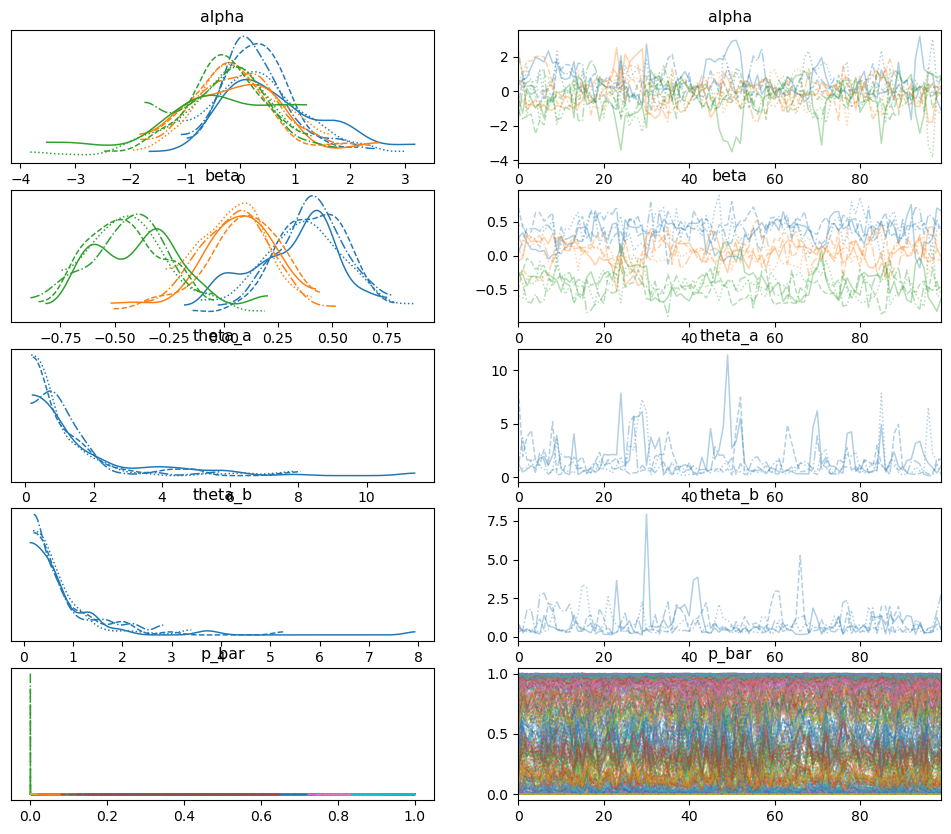

In [4]:
from src.BetaBinomial import BetaBinomial

# init 
mod = BetaBinomial()

# get price, covariates, and target
X = data.drop(['optimal_price', 'Y'], axis=1)
y = data['Y']
price = data['price']

# fit
mod.fit(price, X, y, draws=100)

# print summary
sum = mod.summary()
print(sum.head())

# Posterior analysis
mod.plot_trace()
plt.show()

### Get Posteriors 

For each user with covariates x, get a purchase probability posteriors for a price.

- We can see heterogneity in the demand curves for customers at a given price. some are more willing to buy than others.

(100, 400)


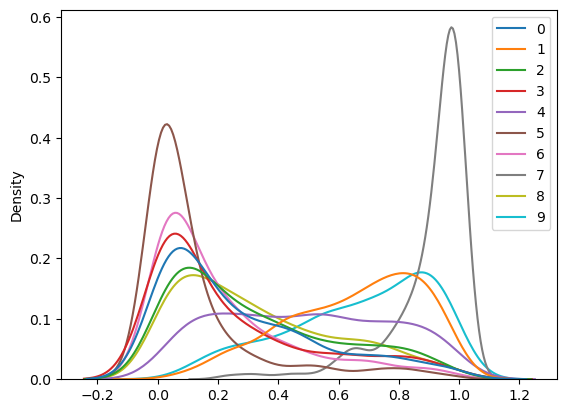

In [10]:
r = mod.predict_proba(price=2, X=X)

# all data points get a posterior 
# probability of purchase
print(r.shape)

# plot ten customers posteriors
sns.kdeplot(r[:10, :].T)
plt.show()

### Visualize Demand Curve

 - Overall demand on average decreases.

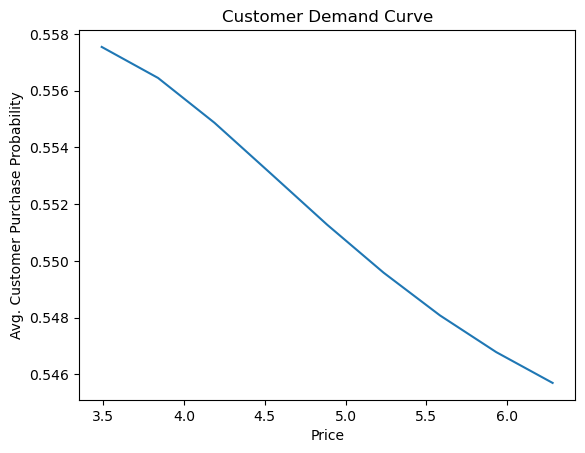

In [29]:
# get prices
prices = np.linspace(
    data.price.quantile(0.10), 
    data.price.quantile(0.90), 
    9
)

# get average purchase probability
avg_probas = [
    mod.predict_proba(price, X=X).mean(axis=1).mean(axis=0)
    for price in prices
]

plt.plot(prices, avg_probas)

plt.title('Customer Demand Curve')
plt.ylabel('Avg. Customer Purchase Probability')
plt.xlabel('Price')

plt.show()

## Bayesian Additive Regression Trees